Run this to verify PyTorch is working fun with CUDA GPU
Training should take about 2 mins to complete if GPU is enabled.

https://github.com/amitrajitbose/handwritten-digit-recognition/blob/master/handwritten_digit_recognition_GPU.ipynb

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST\raw



In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


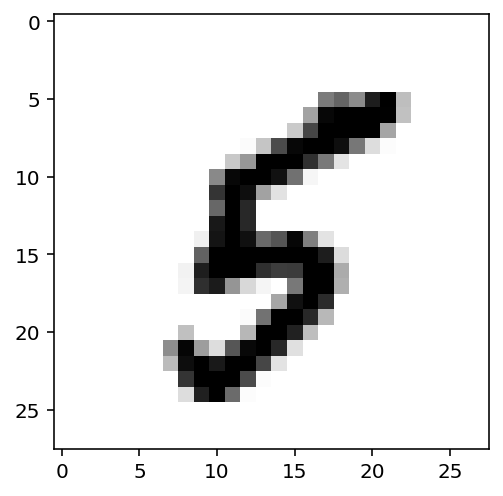

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

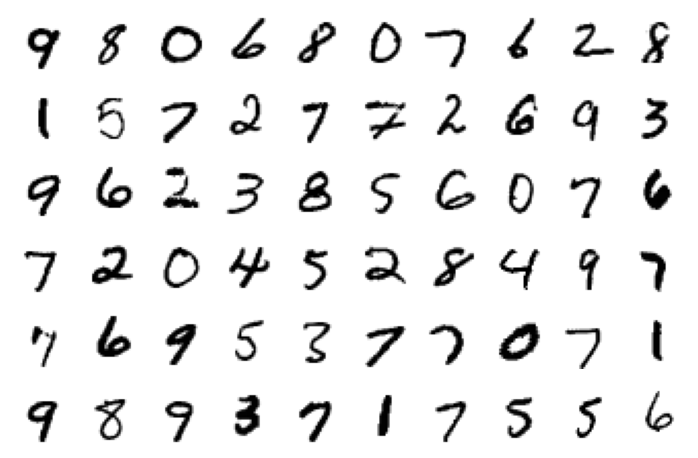

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [9]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        ...,
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]],
       device='cuda:0')


In [10]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [11]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0191,  0.0002,  0.0166,  ...,  0.0075,  0.0165,  0.0330],
        [ 0.0354, -0.0234,  0.0245,  ...,  0.0344, -0.0069,  0.0231],
        [ 0.0065,  0.0331,  0.0257,  ..., -0.0163,  0.0017,  0.0210],
        ...,
        [-0.0272,  0.0321, -0.0272,  ..., -0.0075, -0.0069, -0.0143],
        [-0.0094,  0.0275,  0.0290,  ...,  0.0107,  0.0026, -0.0273],
        [-0.0115, -0.0077,  0.0160,  ..., -0.0278, -0.0324,  0.0084]],
       device='cuda:0', requires_grad=True)
Gradient - tensor([[ 4.0030e-04,  4.0030e-04,  4.0030e-04,  ...,  4.0030e-04,
          4.0030e-04,  4.0030e-04],
        [-7.3078e-04, -7.3078e-04, -7.3078e-04,  ..., -7.3078e-04,
         -7.3078e-04, -7.3078e-04],
        [-1.5619e-03, -1.5619e-03, -1.5619e-03,  ..., -1.5619e-03,
         -1.5619e-03, -1.5619e-03],
        ...,
        [-1.9812e-05, -1.9812e-05, -1.9812e-05,  ..., -1.9812e-05,
         -1.9812e-05, -1.9812e-05],
        [-2.1672e-04, -2.1672e-04, -2.1672e-0

In [12]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0191,  0.0002,  0.0166,  ...,  0.0075,  0.0165,  0.0330],
        [ 0.0354, -0.0234,  0.0245,  ...,  0.0344, -0.0069,  0.0231],
        [ 0.0065,  0.0331,  0.0257,  ..., -0.0162,  0.0018,  0.0211],
        ...,
        [-0.0272,  0.0321, -0.0272,  ..., -0.0075, -0.0069, -0.0143],
        [-0.0094,  0.0275,  0.0290,  ...,  0.0107,  0.0026, -0.0273],
        [-0.0115, -0.0076,  0.0160,  ..., -0.0278, -0.0324,  0.0084]],
       device='cuda:0', requires_grad=True)


In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.630520407801498
Epoch 1 - Training loss: 0.28503686531202627
Epoch 2 - Training loss: 0.22058909016051717
Epoch 3 - Training loss: 0.18049125789182147
Epoch 4 - Training loss: 0.1507166242087955
Epoch 5 - Training loss: 0.12914982621869775
Epoch 6 - Training loss: 0.11216919857071343
Epoch 7 - Training loss: 0.10065600222576337
Epoch 8 - Training loss: 0.09033428638555936
Epoch 9 - Training loss: 0.08225363130911566
Epoch 10 - Training loss: 0.0755283302818137
Epoch 11 - Training loss: 0.06970255901274491
Epoch 12 - Training loss: 0.06326758601059362
Epoch 13 - Training loss: 0.05897555979284476
Epoch 14 - Training loss: 0.05535285634227963

Training Time (in minutes) = 2.9846172253290812


In [15]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


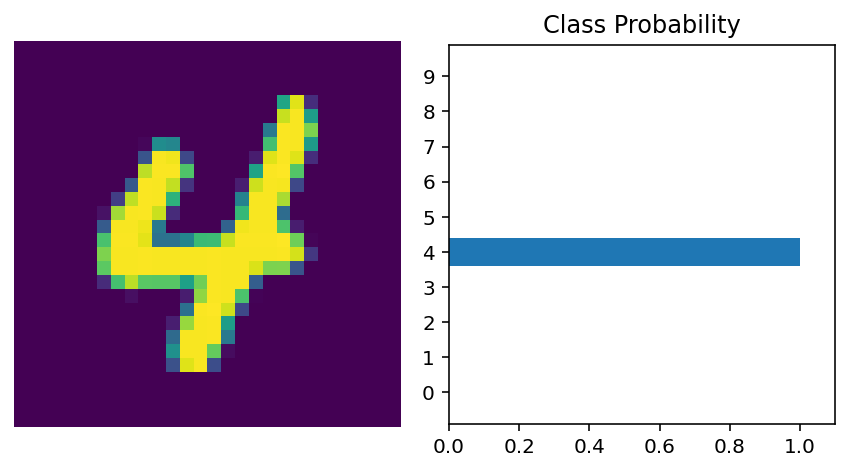

In [16]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [17]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9759
